## Question 1 - Extracting Tesla Stock Data Using yfinance

In [2]:
# Step 1: Install yfinance if not already installed
# (Uncomment and run this line if yfinance is not installed)
# !pip install yfinance

# Step 2: Import required libraries
import yfinance as yf
import pandas as pd

# Step 3: Download Tesla (TSLA) stock data
tesla_data = yf.download("TSLA", start="2010-01-01", end="2025-01-01" , auto_adjust=False)

# Step 4: Display the first 5 rows
tesla_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [6]:
# Install dependencies if needed
# !pip install requests beautifulsoup4 lxml pandas

import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

# Step 1: Get the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0.0.0 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text

# Step 2: Parse the HTML and extract tables
tables = pd.read_html(StringIO(html_data))   # ✅ no FutureWarning now

# Step 3: Pick the correct revenue table (usually the one with 'Revenue' in its header)
tesla_revenue = None
for df in tables:
    if "Revenue" in df.columns or df.iloc[:, 1].astype(str).str.contains(r"\$").any():
        tesla_revenue = df
        break

# Step 4: Clean the revenue data
tesla_revenue = tesla_revenue.rename(columns={tesla_revenue.columns[0]: "Date",
                                              tesla_revenue.columns[1]: "Revenue"})
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(r"[\$,]", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue.dropna(inplace=True)

# Step 5: Show the last 10 rows
tesla_revenue.tail(10)


,Date,Revenue
6,2018,21461
7,2017,11759
8,2016,7000
9,2015,4046
10,2014,3198
11,2013,2013
12,2012,413
13,2011,204
14,2010,117
15,2009,112


## Question 3 - Extracting GameStop Stock Data Using yfinance.

In [7]:
# Step 1: Import libraries
import yfinance as yf
import pandas as pd

# Step 2: Download GameStop (GME) stock data
gamestop_data = yf.download("GME", start="2010-01-01", end="2025-01-01", auto_adjust=False)

# Step 3: Display the first 5 rows
gamestop_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME,GME
Date,,,,,,
2010-01-04,3.854644,5.7250,5.7375,5.5000,5.5175,26702800
2010-01-05,3.959005,5.8800,5.9350,5.7250,5.7275,21269600
2010-01-06,4.044851,6.0075,6.0250,5.8050,5.8650,21471200
2010-01-07,3.443930,5.1150,5.2925,4.8550,5.0025,164761200
2010-01-08,3.415315,5.0725,5.3075,5.0575,5.1600,47872400


## Question 4 - Extracting GameStop Revenue Data Using Webscraping:

In [8]:
# Step 1: Import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

# Step 2: Get the webpage (GameStop revenue page on Macrotrends)
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0.0.0 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text

# Step 3: Parse HTML and extract tables
tables = pd.read_html(StringIO(html_data))

# Step 4: Find the correct table (with 'Revenue')
gamestop_revenue = None
for df in tables:
    if "Revenue" in df.columns or df.iloc[:, 1].astype(str).str.contains(r"\$").any():
        gamestop_revenue = df
        break

# Step 5: Clean the DataFrame
gamestop_revenue = gamestop_revenue.rename(
    columns={gamestop_revenue.columns[0]: "Date", gamestop_revenue.columns[1]: "Revenue"}
)
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].astype(str).str.replace(r"[\$,]", "", regex=True)
gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != ""]
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors="coerce")
gamestop_revenue.dropna(inplace=True)

# Step 6: Display last 10 rows
gamestop_revenue.tail(10)


,Date,Revenue
7,2018,8547
8,2017,7965
9,2016,9364
10,2015,9296
11,2014,9040
12,2013,8887
13,2012,9551
14,2011,9474
15,2010,9078
16,2009,8806


## Question 5 - Tesla Stock and Revenue Dashboard

[*********************100%***********************]  1 of 1 completed


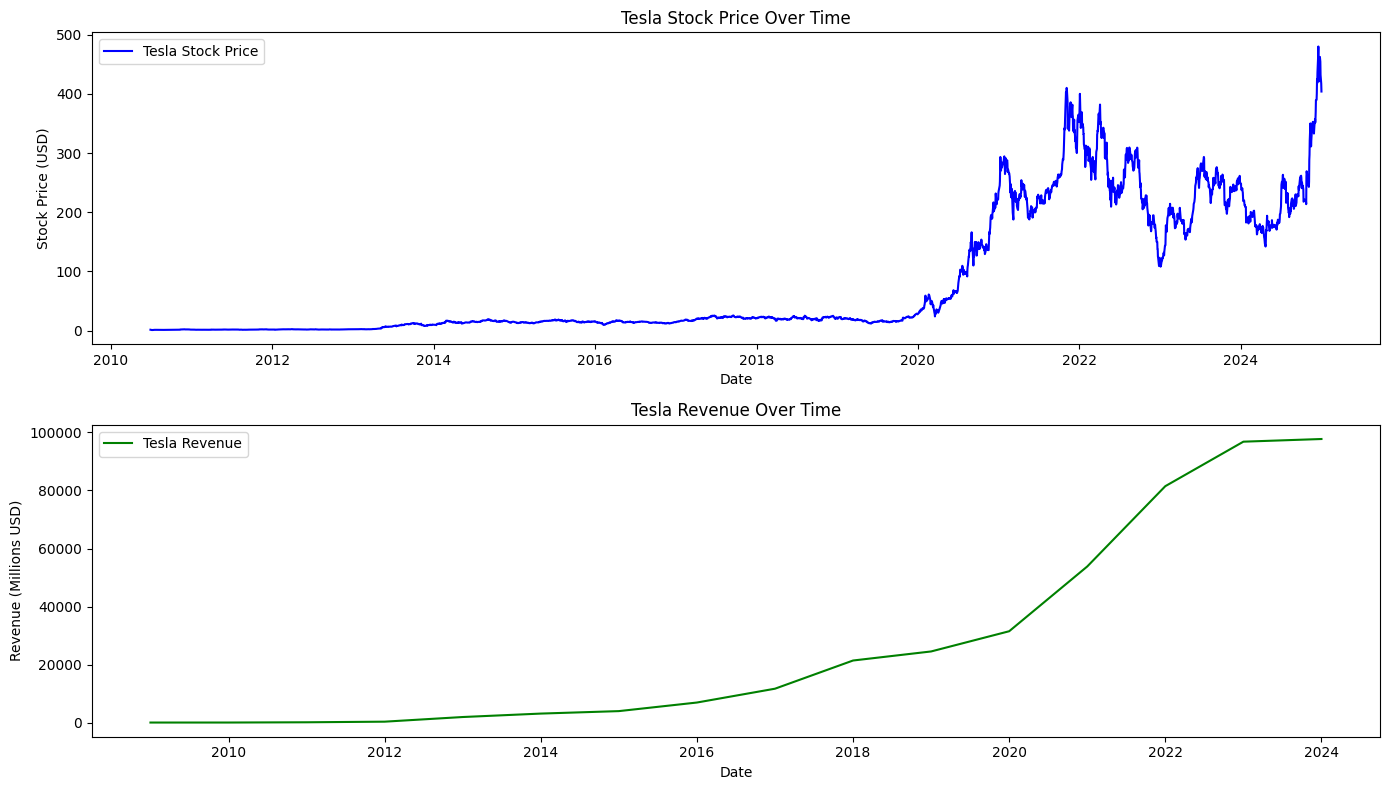

In [9]:
# Step 1: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Part A: Extract Tesla Stock Data
# -------------------------------
tesla_stock = yf.download("TSLA", start="2010-01-01", end="2025-01-01", auto_adjust=False)

# Reset index so Date is a column
tesla_stock.reset_index(inplace=True)

# -------------------------------
# Part B: Extract Tesla Revenue Data (from Q2)
# -------------------------------
import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0.0.0 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text
tables = pd.read_html(StringIO(html_data))

tesla_revenue = None
for df in tables:
    if "Revenue" in df.columns or df.iloc[:, 1].astype(str).str.contains(r"\$").any():
        tesla_revenue = df
        break

tesla_revenue = tesla_revenue.rename(
    columns={tesla_revenue.columns[0]: "Date", tesla_revenue.columns[1]: "Revenue"}
)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(r"[\$,]", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue.dropna(inplace=True)

# -------------------------------
# Part C: Plot Dashboard
# -------------------------------
plt.figure(figsize=(14, 8))

# Subplot 1: Tesla Stock Price
plt.subplot(2, 1, 1)
plt.plot(tesla_stock["Date"], tesla_stock["Close"], label="Tesla Stock Price", color="blue")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()

# Subplot 2: Tesla Revenue
plt.subplot(2, 1, 2)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Tesla Revenue", color="green")
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (Millions USD)")
plt.legend()

plt.tight_layout()
plt.show()


## Question 6 - GameStop Stock and Revenue Dashboard

[*********************100%***********************]  1 of 1 completed


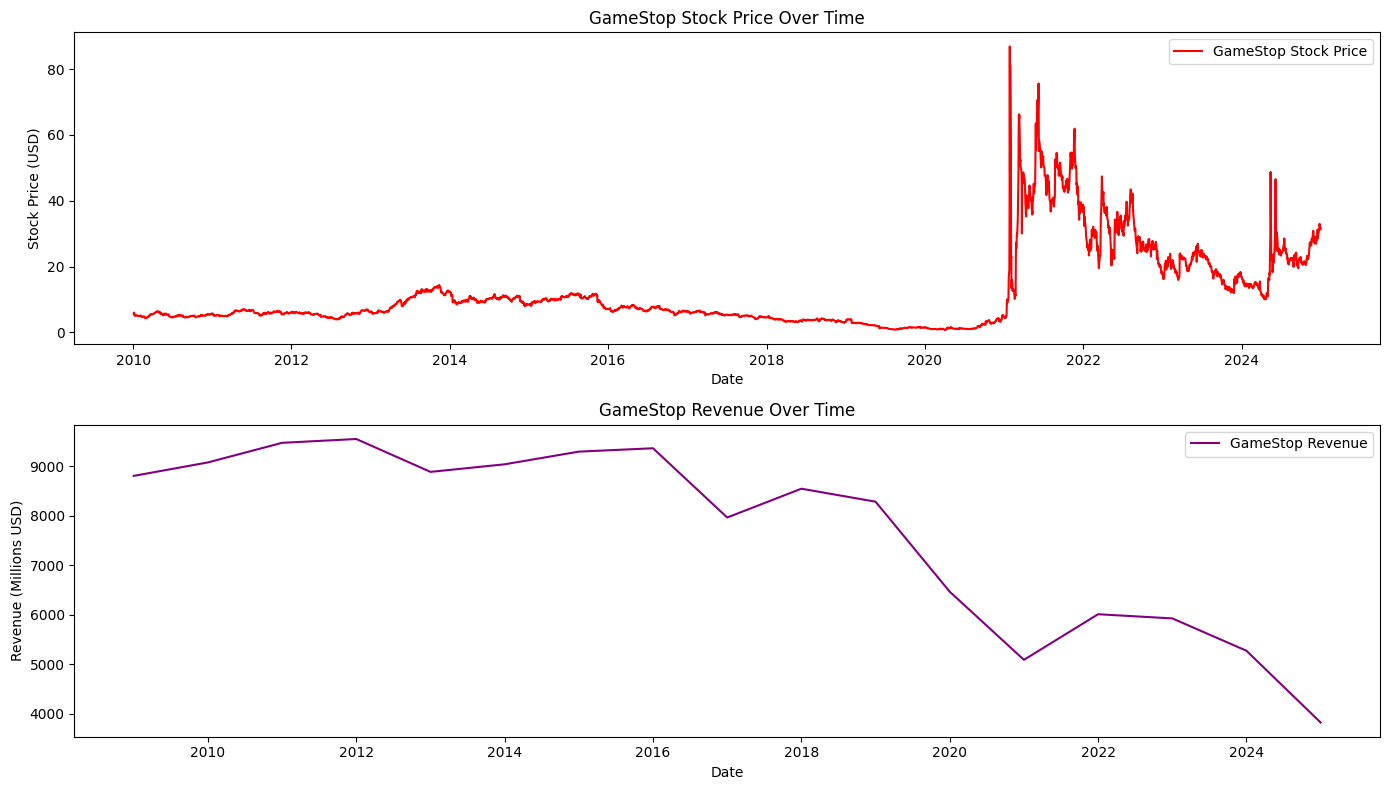

In [10]:
# Step 1: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from io import StringIO

# -------------------------------
# Part A: Extract GameStop Stock Data
# -------------------------------
gamestop_stock = yf.download("GME", start="2010-01-01", end="2025-01-01", auto_adjust=False)

# Reset index so Date is a column
gamestop_stock.reset_index(inplace=True)

# -------------------------------
# Part B: Extract GameStop Revenue Data (from Q4)
# -------------------------------
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0.0.0 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text
tables = pd.read_html(StringIO(html_data))

gamestop_revenue = None
for df in tables:
    if "Revenue" in df.columns or df.iloc[:, 1].astype(str).str.contains(r"\$").any():
        gamestop_revenue = df
        break

gamestop_revenue = gamestop_revenue.rename(
    columns={gamestop_revenue.columns[0]: "Date", gamestop_revenue.columns[1]: "Revenue"}
)
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].astype(str).str.replace(r"[\$,]", "", regex=True)
gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != ""]
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors="coerce")
gamestop_revenue.dropna(inplace=True)

# -------------------------------
# Part C: Plot Dashboard
# -------------------------------
plt.figure(figsize=(14, 8))

# Subplot 1: GameStop Stock Price
plt.subplot(2, 1, 1)
plt.plot(gamestop_stock["Date"], gamestop_stock["Close"], label="GameStop Stock Price", color="red")
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()

# Subplot 2: GameStop Revenue
plt.subplot(2, 1, 2)
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], label="GameStop Revenue", color="purple")
plt.title("GameStop Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (Millions USD)")
plt.legend()

plt.tight_layout()
plt.show()


## ---------------------------------->                                        The End: <---------------------------------